In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [3]:
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [4]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return([XTrain,XTest,yTrain,yTest])

In [5]:
def knn_classifier(k,XTrain,yTrain,XTest):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain, yTrain)
    yPred = knn.predict(XTest)
    return yPred

In [6]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [7]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [8]:
def naive_bayes_classifier(XTrain,yTrain,XTest):
    gnb = GaussianNB()
    gnb.fit(XTrain, yTrain)
    yPred = gnb.predict(XTest)
    return yPred

In [9]:
def pca(df,n):
    x=df.drop(df.columns[-1],axis=1)
    pca = PCA(n_components=n)
    pComps = pca.fit_transform(x)
    pDf = pd.DataFrame(data = pComps)
    pDf[df.columns[-1]]=df[df.columns[-1]]
    return pDf

In [10]:
def bayes(X,y):
     XTrain, XTest, YTrain, YTest =train_test_split(X,y, test_size=0.3, random_state=42,shuffle=True)
     XTrain0=XTrain[XTrain['Z_Scratch'] == 0]
     XTrain1=XTrain[XTrain['Z_Scratch'] == 1]
     meanXTrain0=XTrain0.mean(axis = 0)
     meanXTrain1=XTrain1.mean(axis = 0)
     covXTrain0=XTrain0.cov()
     covXTrain1=XTrain1.cov()
     YPred=[]
     for i in range(len(XTest)):
         p1=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain1,cov= covXTrain1,allow_singular=True)
         p0=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain0,cov= covXTrain0,allow_singular=True)
         if(p1>p0):
             YPred.append(1)
         else:
             YPred.append(0)
     return YPred

In [13]:
def main():
    import warnings
    from sklearn.exceptions import DataConversionWarning
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)
    df=load_dataset("../inLab/SteelPlateFaults-2class.csv")

    dfStd=standardize(df)
    XTrain=train_test(dfStd)[0]
    XTest=train_test(dfStd)[1]
    yTrain=train_test(dfStd)[2]
    yTest=train_test(dfStd)[3]
    X = df
    y = df['Z_Scratch']
    yTest = train_test(df)[3]
    
    #Xdata=df.drop(df.columns[-1],axis=1)
    #ydata=df[df.columns[-1]] 
    
    k = range(1,22,2)
    accuracies=[]
    confusion=[]
    for i in k:
        print("K = ",i)
        yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
        print(confusion_matrixp(yPredKnn,yTest))
        confusion.append(confusion_matrixp(yPredKnn,yTest))
        print(percentage_accuracy(yPredKnn,yTest),"\n")
        accuracies.append(percentage_accuracy(yPredKnn,yTest))
        
    yPredBayes = bayes(X,y)
    print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
    print("Confusion Matrix by Bayes Classifier: \n",confusion_matrixp(yPredBayes,yTest),"\n")
    print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
    print("Accuracy by Bayes Classifier:",percentage_accuracy(yPredBayes,yTest))
    
    plt.plot(range(1,22,2),accuracies,color='b')
    plt.xlabel("Value of k")
    plt.ylabel("Accuracy")
    plt.show()

In [12]:
if __name__ == "__main__":
    main()

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 



NameError: name 'multivariate_normal' is not defined

VALUE OF N:  1 

K =  1
[[80 31]
 [52 12]]
0.5257142857142857 

K =  3
[[91 20]
 [47 17]]
0.6171428571428571 

K =  5
[[100  11]
 [ 51  13]]
0.6457142857142857 

K =  7
[[101  10]
 [ 50  14]]
0.6571428571428571 

K =  9
[[105   6]
 [ 51  13]]
0.6742857142857143 

K =  11
[[104   7]
 [ 51  13]]
0.6685714285714286 

K =  13
[[106   5]
 [ 51  13]]
0.68 

K =  15
[[105   6]
 [ 51  13]]
0.6742857142857143 

K =  17
[[105   6]
 [ 53  11]]
0.6628571428571428 

K =  19
[[107   4]
 [ 56   8]]
0.6571428571428571 

K =  21
[[107   4]
 [ 54  10]]
0.6685714285714286 

Confusion Matrix by KNN Classifier: 
 [[101.          10.        ]
 [ 51.54545455  12.45454545]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.6483116883116883
Accuracy by Bayes Classifier : 0.8514285714285714


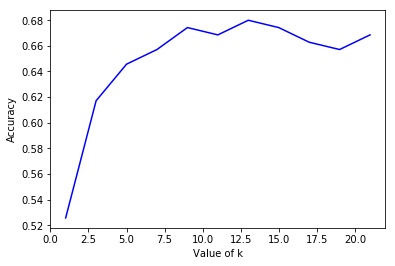

##############################

VALUE OF N:  2 

K =  1
[[97 14]
 [ 9 55]]
0.8685714285714285 

K =  3
[[97 14]
 [10 54]]
0.8628571428571429 

K =  5
[[100  11]
 [  9  55]]
0.8857142857142857 

K =  7
[[98 13]
 [ 9 55]]
0.8742857142857143 

K =  9
[[96 15]
 [ 6 58]]
0.88 

K =  11
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  13
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  15
[[96 15]
 [ 6 58]]
0.88 

K =  17
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  19
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  21
[[94 17]
 [ 6 58]]
0.8685714285714285 

Confusion Matrix by KNN Classifier: 
 [[96.18181818 14.81818182]
 [ 7.54545455 56.45454545]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.8722077922077921
Accuracy by Bayes Classifier : 0.8514285714285714


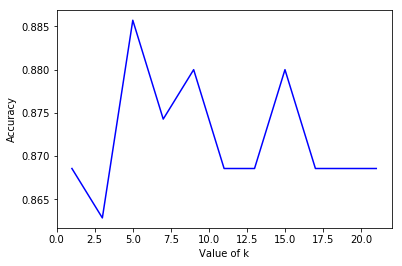

##############################

VALUE OF N:  3 

K =  1
[[101  10]
 [ 11  53]]
0.88 

K =  3
[[104   7]
 [  8  56]]
0.9142857142857143 

K =  5
[[101  10]
 [  9  55]]
0.8914285714285715 

K =  7
[[98 13]
 [ 8 56]]
0.88 

K =  9
[[98 13]
 [11 53]]
0.8628571428571429 

K =  11
[[98 13]
 [ 9 55]]
0.8742857142857143 

K =  13
[[97 14]
 [ 6 58]]
0.8857142857142857 

K =  15
[[96 15]
 [ 6 58]]
0.88 

K =  17
[[95 16]
 [ 5 59]]
0.88 

K =  19
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  21
[[94 17]
 [ 6 58]]
0.8685714285714285 

Confusion Matrix by KNN Classifier: 
 [[97.81818182 13.18181818]
 [ 7.72727273 56.27272727]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.8805194805194805
Accuracy by Bayes Classifier : 0.8514285714285714


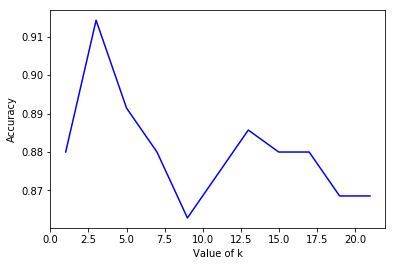

##############################

VALUE OF N:  4 

K =  1
[[104   7]
 [  5  59]]
0.9314285714285714 

K =  3
[[104   7]
 [  2  62]]
0.9485714285714286 

K =  5
[[101  10]
 [  3  61]]
0.9257142857142857 

K =  7
[[97 14]
 [ 1 63]]
0.9142857142857143 

K =  9
[[96 15]
 [ 0 64]]
0.9142857142857143 

K =  11
[[97 14]
 [ 1 63]]
0.9142857142857143 

K =  13
[[97 14]
 [ 1 63]]
0.9142857142857143 

K =  15
[[99 12]
 [ 8 56]]
0.8857142857142857 

K =  17
[[99 12]
 [ 8 56]]
0.8857142857142857 

K =  19
[[100  11]
 [  8  56]]
0.8914285714285715 

K =  21
[[99 12]
 [ 9 55]]
0.88 

Confusion Matrix by KNN Classifier: 
 [[99.36363636 11.63636364]
 [ 4.18181818 59.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9096103896103898
Accuracy by Bayes Classifier : 0.8514285714285714


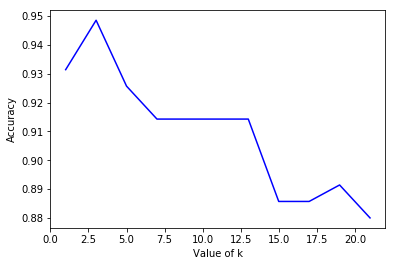

##############################

VALUE OF N:  5 

K =  1
[[105   6]
 [  4  60]]
0.9428571428571428 

K =  3
[[106   5]
 [  2  62]]
0.96 

K =  5
[[101  10]
 [  2  62]]
0.9314285714285714 

K =  7
[[100  11]
 [  2  62]]
0.9257142857142857 

K =  9
[[99 12]
 [ 1 63]]
0.9257142857142857 

K =  11
[[98 13]
 [ 0 64]]
0.9257142857142857 

K =  13
[[96 15]
 [ 0 64]]
0.9142857142857143 

K =  15
[[96 15]
 [ 7 57]]
0.8742857142857143 

K =  17
[[95 16]
 [ 7 57]]
0.8685714285714285 

K =  19
[[95 16]
 [ 7 57]]
0.8685714285714285 

K =  21
[[95 16]
 [ 7 57]]
0.8685714285714285 

Confusion Matrix by KNN Classifier: 
 [[98.72727273 12.27272727]
 [ 3.54545455 60.45454545]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9096103896103895
Accuracy by Bayes Classifier : 0.8514285714285714


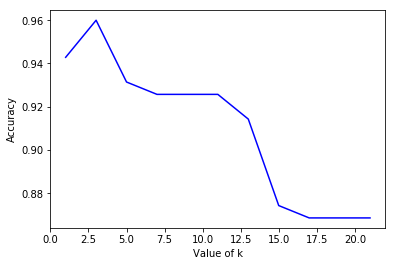

##############################

VALUE OF N:  6 

K =  1
[[104   7]
 [  2  62]]
0.9485714285714286 

K =  3
[[106   5]
 [  3  61]]
0.9542857142857143 

K =  5
[[102   9]
 [  1  63]]
0.9428571428571428 

K =  7
[[101  10]
 [  3  61]]
0.9257142857142857 

K =  9
[[100  11]
 [  0  64]]
0.9371428571428572 

K =  11
[[100  11]
 [  0  64]]
0.9371428571428572 

K =  13
[[97 14]
 [ 0 64]]
0.92 

K =  15
[[97 14]
 [ 7 57]]
0.88 

K =  17
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  19
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  21
[[98 13]
 [ 8 56]]
0.88 

Confusion Matrix by KNN Classifier: 
 [[99.72727273 11.27272727]
 [ 3.63636364 60.36363636]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.914805194805195
Accuracy by Bayes Classifier : 0.8514285714285714


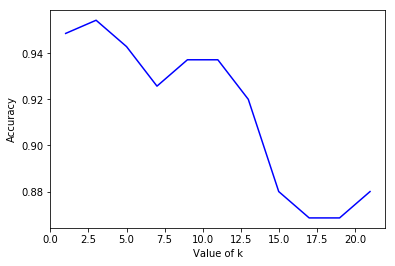

##############################

VALUE OF N:  7 

K =  1
[[105   6]
 [  1  63]]
0.96 

K =  3
[[106   5]
 [  1  63]]
0.9657142857142857 

K =  5
[[101  10]
 [  1  63]]
0.9371428571428572 

K =  7
[[100  11]
 [  1  63]]
0.9314285714285714 

K =  9
[[98 13]
 [ 1 63]]
0.92 

K =  11
[[95 16]
 [ 1 63]]
0.9028571428571428 

K =  13
[[95 16]
 [ 1 63]]
0.9028571428571428 

K =  15
[[96 15]
 [ 5 59]]
0.8857142857142857 

K =  17
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  19
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  21
[[95 16]
 [ 8 56]]
0.8628571428571429 

Confusion Matrix by KNN Classifier: 
 [[98.45454545 12.54545455]
 [ 3.27272727 60.72727273]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9096103896103895
Accuracy by Bayes Classifier : 0.8514285714285714


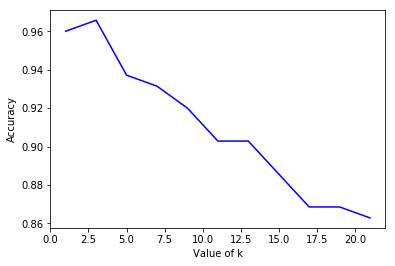

##############################

VALUE OF N:  8 

K =  1
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  3
[[106   5]
 [  1  63]]
0.9657142857142857 

K =  5
[[102   9]
 [  1  63]]
0.9428571428571428 

K =  7
[[100  11]
 [  1  63]]
0.9314285714285714 

K =  9
[[98 13]
 [ 1 63]]
0.92 

K =  11
[[96 15]
 [ 1 63]]
0.9085714285714286 

K =  13
[[95 16]
 [ 1 63]]
0.9028571428571428 

K =  15
[[96 15]
 [ 4 60]]
0.8914285714285715 

K =  17
[[95 16]
 [ 8 56]]
0.8628571428571429 

K =  19
[[95 16]
 [ 8 56]]
0.8628571428571429 

K =  21
[[95 16]
 [ 8 56]]
0.8628571428571429 

Confusion Matrix by KNN Classifier: 
 [[98.72727273 12.27272727]
 [ 3.18181818 60.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9116883116883117
Accuracy by Bayes Classifier : 0.8514285714285714


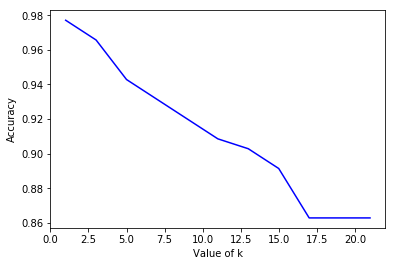

##############################

VALUE OF N:  9 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  5
[[106   5]
 [  1  63]]
0.9657142857142857 

K =  7
[[107   4]
 [  1  63]]
0.9714285714285714 

K =  9
[[107   4]
 [  1  63]]
0.9714285714285714 

K =  11
[[105   6]
 [  1  63]]
0.96 

K =  13
[[104   7]
 [  1  63]]
0.9542857142857143 

K =  15
[[104   7]
 [  1  63]]
0.9542857142857143 

K =  17
[[102   9]
 [  1  63]]
0.9428571428571428 

K =  19
[[102   9]
 [  2  62]]
0.9371428571428572 

K =  21
[[102   9]
 [  2  62]]
0.9371428571428572 

Confusion Matrix by KNN Classifier: 
 [[105.09090909   5.90909091]
 [  1.18181818  62.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9594805194805196
Accuracy by Bayes Classifier : 0.8514285714285714


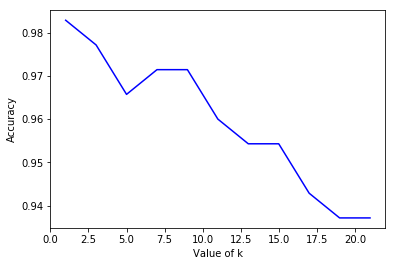

##############################

VALUE OF N:  10 

K =  1
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  3
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  5
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  11
[[108   3]
 [  2  62]]
0.9714285714285714 

K =  13
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  15
[[109   2]
 [  5  59]]
0.96 

K =  17
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  19
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  21
[[108   3]
 [  5  59]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.27272727   1.72727273]
 [  3.27272727  60.72727273]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9714285714285714
Accuracy by Bayes Classifier : 0.8514285714285714


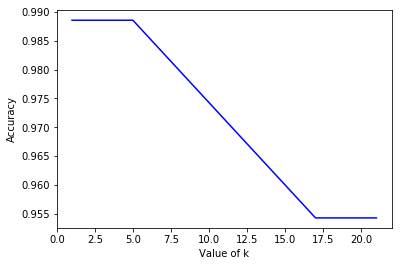

##############################

VALUE OF N:  11 

K =  1
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  3
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  5
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  7
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  9
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  11
[[108   3]
 [  2  62]]
0.9714285714285714 

K =  13
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  15
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  17
[[106   5]
 [  5  59]]
0.9428571428571428 

K =  19
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  21
[[105   6]
 [  5  59]]
0.9371428571428572 

Confusion Matrix by KNN Classifier: 
 [[108.45454545   2.54545455]
 [  3.18181818  60.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9672727272727273
Accuracy by Bayes Classifier : 0.8514285714285714


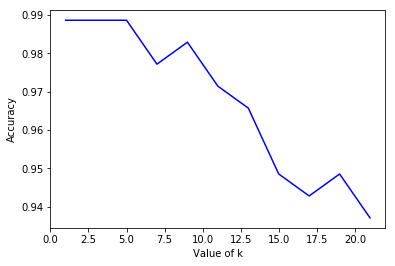

##############################

VALUE OF N:  12 

K =  1
[[111   0]
 [  2  62]]
0.9885714285714285 

K =  3
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  5
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  7
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  9
[[108   3]
 [  2  62]]
0.9714285714285714 

K =  11
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  13
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  15
[[107   4]
 [  4  60]]
0.9542857142857143 

K =  17
[[105   6]
 [  4  60]]
0.9428571428571428 

K =  19
[[106   5]
 [  5  59]]
0.9428571428571428 

K =  21
[[106   5]
 [  4  60]]
0.9485714285714286 

Confusion Matrix by KNN Classifier: 
 [[107.63636364   3.36363636]
 [  2.81818182  61.18181818]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9646753246753247
Accuracy by Bayes Classifier : 0.8514285714285714


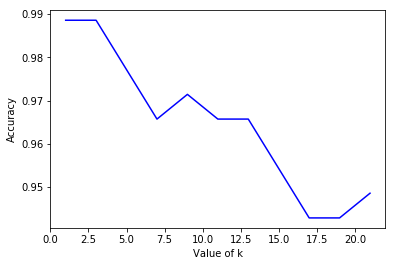

##############################

VALUE OF N:  13 

K =  1
[[111   0]
 [  1  63]]
0.9942857142857143 

K =  3
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  5
[[107   4]
 [  1  63]]
0.9714285714285714 

K =  7
[[106   5]
 [  2  62]]
0.96 

K =  9
[[108   3]
 [  4  60]]
0.96 

K =  11
[[108   3]
 [  4  60]]
0.96 

K =  13
[[108   3]
 [  4  60]]
0.96 

K =  15
[[106   5]
 [  4  60]]
0.9485714285714286 

K =  17
[[106   5]
 [  3  61]]
0.9542857142857143 

K =  19
[[106   5]
 [  4  60]]
0.9485714285714286 

K =  21
[[106   5]
 [  5  59]]
0.9428571428571428 

Confusion Matrix by KNN Classifier: 
 [[107.27272727   3.72727273]
 [  3.          61.        ]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9615584415584415
Accuracy by Bayes Classifier : 0.8514285714285714


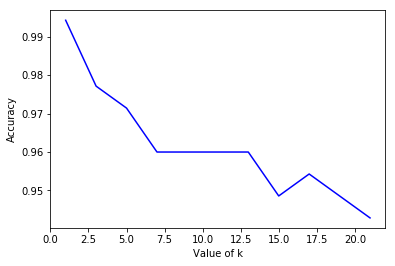

##############################

VALUE OF N:  14 

K =  1
[[111   0]
 [  1  63]]
0.9942857142857143 

K =  3
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  5
[[107   4]
 [  1  63]]
0.9714285714285714 

K =  7
[[107   4]
 [  1  63]]
0.9714285714285714 

K =  9
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  11
[[107   4]
 [  3  61]]
0.96 

K =  13
[[108   3]
 [  4  60]]
0.96 

K =  15
[[106   5]
 [  4  60]]
0.9485714285714286 

K =  17
[[105   6]
 [  3  61]]
0.9485714285714286 

K =  19
[[105   6]
 [  3  61]]
0.9485714285714286 

K =  21
[[105   6]
 [  3  61]]
0.9485714285714286 

Confusion Matrix by KNN Classifier: 
 [[107.09090909   3.90909091]
 [  2.27272727  61.72727273]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9646753246753247
Accuracy by Bayes Classifier : 0.8514285714285714


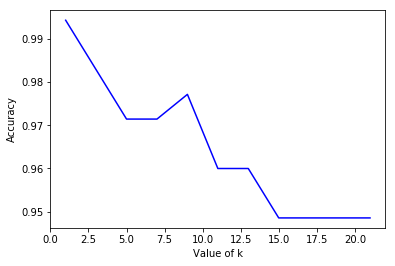

##############################

VALUE OF N:  15 

K =  1
[[111   0]
 [  1  63]]
0.9942857142857143 

K =  3
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  5
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  7
[[108   3]
 [  1  63]]
0.9771428571428571 

K =  9
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  11
[[108   3]
 [  3  61]]
0.9657142857142857 

K =  13
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  15
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  17
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  19
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  21
[[109   2]
 [  3  61]]
0.9714285714285714 

Confusion Matrix by KNN Classifier: 
 [[109.   2.]
 [  2.  62.]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.977142857142857
Accuracy by Bayes Classifier : 0.8514285714285714


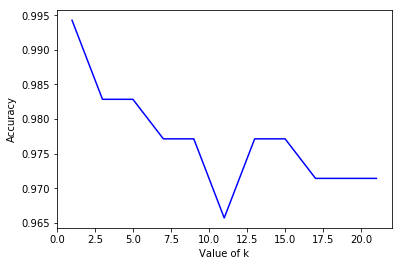

##############################

VALUE OF N:  16 

K =  1
[[111   0]
 [  1  63]]
0.9942857142857143 

K =  3
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  5
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  7
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  9
[[108   3]
 [  4  60]]
0.96 

K =  11
[[108   3]
 [  4  60]]
0.96 

K =  13
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  15
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  17
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  19
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  21
[[109   2]
 [  4  60]]
0.9657142857142857 

Confusion Matrix by KNN Classifier: 
 [[109.09090909   1.90909091]
 [  3.18181818  60.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.970909090909091
Accuracy by Bayes Classifier : 0.8514285714285714


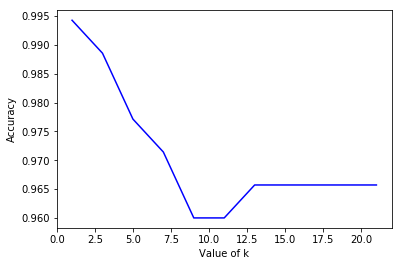

##############################

VALUE OF N:  17 

K =  1
[[111   0]
 [  1  63]]
0.9942857142857143 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  7
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  9
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  11
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  13
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  15
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  17
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  19
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  21
[[109   2]
 [  4  60]]
0.9657142857142857 

Confusion Matrix by KNN Classifier: 
 [[109.36363636   1.63636364]
 [  2.90909091  61.09090909]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9740259740259741
Accuracy by Bayes Classifier : 0.8514285714285714


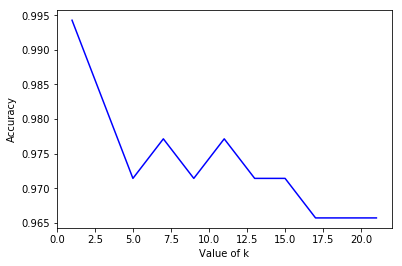

##############################

VALUE OF N:  18 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[110   1]
 [  4  60]]
0.9714285714285714 

K =  5
[[108   3]
 [  4  60]]
0.96 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  5  59]]
0.96 

K =  11
[[108   3]
 [  2  62]]
0.9714285714285714 

K =  13
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  15
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  17
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  19
[[108   3]
 [  3  61]]
0.9657142857142857 

K =  21
[[107   4]
 [  3  61]]
0.96 

Confusion Matrix by KNN Classifier: 
 [[108.18181818   2.81818182]
 [  3.72727273  60.27272727]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9625974025974028
Accuracy by Bayes Classifier : 0.8514285714285714


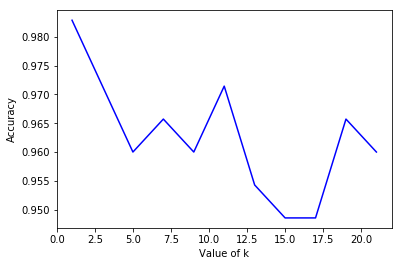

##############################

VALUE OF N:  19 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  5
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  11
[[108   3]
 [  3  61]]
0.9657142857142857 

K =  13
[[108   3]
 [  4  60]]
0.96 

K =  15
[[108   3]
 [  4  60]]
0.96 

K =  17
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  19
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  21
[[108   3]
 [  5  59]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[108.45454545   2.54545455]
 [  3.72727273  60.27272727]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9641558441558439
Accuracy by Bayes Classifier : 0.8514285714285714


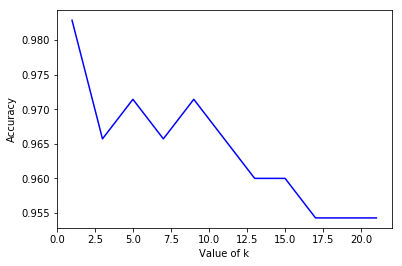

##############################

VALUE OF N:  20 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  5
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  7
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  9
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  11
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  13
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  15
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  17
[[109   2]
 [  5  59]]
0.96 

K =  19
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  21
[[107   4]
 [  5  59]]
0.9485714285714286 

Confusion Matrix by KNN Classifier: 
 [[108.72727273   2.27272727]
 [  3.45454545  60.54545455]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9672727272727272
Accuracy by Bayes Classifier : 0.8514285714285714


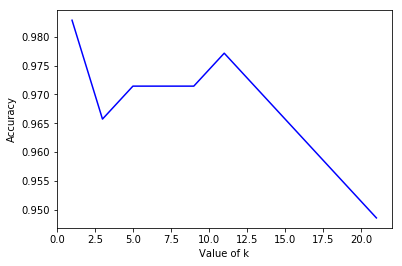

##############################

VALUE OF N:  21 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[109   2]
 [  5  59]]
0.96 

K =  5
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  11
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  13
[[109   2]
 [  5  59]]
0.96 

K =  15
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  17
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  19
[[107   4]
 [  6  58]]
0.9428571428571428 

K =  21
[[107   4]
 [  7  57]]
0.9371428571428572 

Confusion Matrix by KNN Classifier: 
 [[108.27272727   2.72727273]
 [  4.45454545  59.54545455]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9589610389610391
Accuracy by Bayes Classifier : 0.8514285714285714


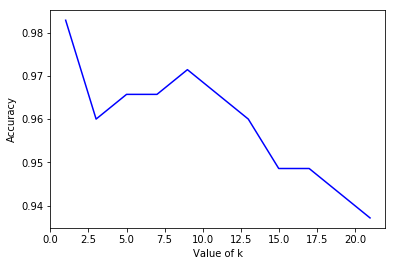

##############################

VALUE OF N:  22 

K =  1
[[109   2]
 [  1  63]]
0.9828571428571429 

K =  3
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  5
[[109   2]
 [  5  59]]
0.96 

K =  7
[[109   2]
 [  5  59]]
0.96 

K =  9
[[109   2]
 [  5  59]]
0.96 

K =  11
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  13
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  15
[[108   3]
 [  6  58]]
0.9485714285714286 

K =  17
[[107   4]
 [  6  58]]
0.9428571428571428 

K =  19
[[106   5]
 [  6  58]]
0.9371428571428572 

K =  21
[[106   5]
 [  8  56]]
0.9257142857142857 

Confusion Matrix by KNN Classifier: 
 [[108.           3.        ]
 [  5.09090909  58.90909091]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9537662337662337
Accuracy by Bayes Classifier : 0.8514285714285714


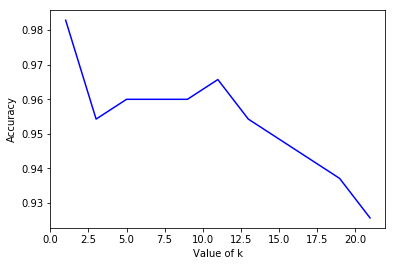

##############################

VALUE OF N:  23 

K =  1
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  3
[[109   2]
 [  5  59]]
0.96 

K =  5
[[109   2]
 [  5  59]]
0.96 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  5  59]]
0.96 

K =  11
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  13
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  15
[[108   3]
 [  5  59]]
0.9542857142857143 

K =  17
[[107   4]
 [  5  59]]
0.9485714285714286 

K =  19
[[107   4]
 [  6  58]]
0.9428571428571428 

K =  21
[[108   3]
 [  8  56]]
0.9371428571428572 

Confusion Matrix by KNN Classifier: 
 [[108.36363636   2.63636364]
 [  4.81818182  59.18181818]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9574025974025975
Accuracy by Bayes Classifier : 0.8514285714285714


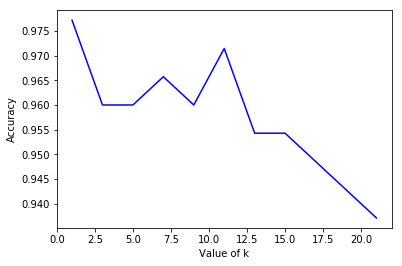

##############################

VALUE OF N:  24 

K =  1
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  3
[[109   2]
 [  5  59]]
0.96 

K =  5
[[109   2]
 [  5  59]]
0.96 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  11
[[109   2]
 [  5  59]]
0.96 

K =  13
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  15
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  17
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  19
[[109   2]
 [  7  57]]
0.9485714285714286 

K =  21
[[109   2]
 [  8  56]]
0.9428571428571428 

Confusion Matrix by KNN Classifier: 
 [[109.   2.]
 [  5.  59.]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9600000000000001
Accuracy by Bayes Classifier : 0.8514285714285714


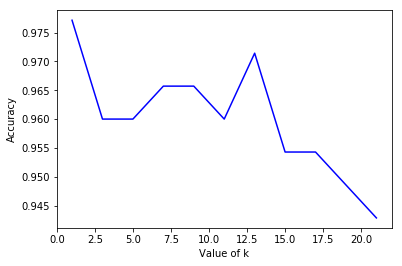

##############################

VALUE OF N:  25 

K =  1
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  3
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  5
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  7
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  9
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  11
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  13
[[110   1]
 [  4  60]]
0.9714285714285714 

K =  15
[[109   2]
 [  7  57]]
0.9485714285714286 

K =  17
[[109   2]
 [  7  57]]
0.9485714285714286 

K =  19
[[109   2]
 [  8  56]]
0.9428571428571428 

K =  21
[[109   2]
 [  7  57]]
0.9485714285714286 

Confusion Matrix by KNN Classifier: 
 [[109.09090909   1.90909091]
 [  4.63636364  59.36363636]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9625974025974027
Accuracy by Bayes Classifier : 0.8514285714285714


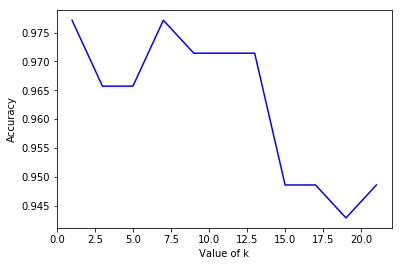

##############################

VALUE OF N:  26 

K =  1
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  3
[[109   2]
 [  5  59]]
0.96 

K =  5
[[109   2]
 [  5  59]]
0.96 

K =  7
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  9
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  11
[[109   2]
 [  3  61]]
0.9714285714285714 

K =  13
[[109   2]
 [  5  59]]
0.96 

K =  15
[[109   2]
 [  7  57]]
0.9485714285714286 

K =  17
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  19
[[109   2]
 [  7  57]]
0.9485714285714286 

K =  21
[[109   2]
 [  7  57]]
0.9485714285714286 

Confusion Matrix by KNN Classifier: 
 [[109.09090909   1.90909091]
 [  4.90909091  59.09090909]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.961038961038961
Accuracy by Bayes Classifier : 0.8514285714285714


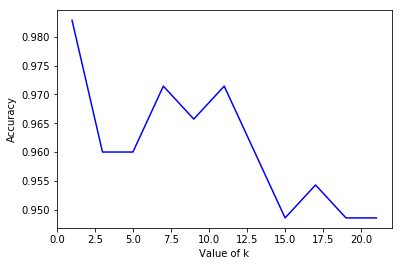

##############################

VALUE OF N:  27 

K =  1
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  3
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  5
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  7
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  9
[[109   2]
 [  5  59]]
0.96 

K =  11
[[109   2]
 [  4  60]]
0.9657142857142857 

K =  13
[[109   2]
 [  6  58]]
0.9542857142857143 

K =  15
[[109   2]
 [  8  56]]
0.9428571428571428 

K =  17
[[108   3]
 [  8  56]]
0.9371428571428572 

K =  19
[[109   2]
 [  8  56]]
0.9428571428571428 

K =  21
[[109   2]
 [  8  56]]
0.9428571428571428 

Confusion Matrix by KNN Classifier: 
 [[109.   2.]
 [  6.  58.]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9542857142857144
Accuracy by Bayes Classifier : 0.8514285714285714


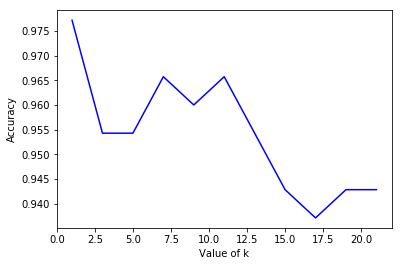

##############################



In [404]:
df=load_dataset("../inLab/SteelPlateFaults-2class.csv")

l=[i for i in range(1,len(df.columns))]

for i in l:
    print("VALUE OF N: ",i,"\n")
    pdf = pca(df,i)
    #print(pdf.head())
    
    dfStd=standardize(pdf)
    XTrain=train_test(dfStd)[0]
    XTest=train_test(dfStd)[1]
    yTrain=train_test(dfStd)[2]
    yTest=train_test(dfStd)[3]
    X = df
    y = df['Z_Scratch']
    yTest = train_test(df)[3]

    k = range(1,22,2)
    accuracies=[]
    confusion=[]
    for i in k:
        print("K = ",i)
        yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
        print(confusion_matrixp(yPredKnn,yTest))
        confusion.append(confusion_matrixp(yPredKnn,yTest))
        print(percentage_accuracy(yPredKnn,yTest),"\n")
        accuracies.append(percentage_accuracy(yPredKnn,yTest))
    yPredBayes = bayes(X,y)
    print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
    print("Confusion Matrix by Bayes Classifier: \n",confusion_matrixp(yPredBayes,yTest),"\n")
    print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
    print("Accuracy by Bayes Classifier :",percentage_accuracy(yPredBayes,yTest))
    plt.plot(range(1,22,2),accuracies,color='b')
    plt.xlabel("Value of k")
    plt.ylabel("Accuracy")
    plt.show()
    print("##############################\n")

In [405]:
#Q2------------

df=load_dataset("../inLab/SteelPlateFaults-2class.csv")
df=standardize(df) 

X = df
y = df['Z_Scratch']
yTest = train_test(df)[3]
y = Bayes(X,y)

print("Using Bayes")
print("Confusion Matrix: \n",confusion_matrixp(y,yTest),"\n")
print("Accuracy of : \n",percentage_accuracy(y,yTest))

Using Bayes
Confusion Matrix: 
 [[108   3]
 [  1  63]] 

Accuracy of : 
 0.9771428571428571
